In [4]:
! pip install chardet

In [6]:
import chardet

# Baca file dalam mode binary
with open('Sentiment1.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7283125246084868, 'language': ''}


In [12]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re


# Buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi pembersihan teks
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Hapus URL
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\d+', '', text)      # Hapus angka
    return text.lower().strip()

# Stemming teks
def stem_text(Text):
    return stemmer.stem(Text)

# Ubah 'ISO-8859-1' sesuai dengan hasil dari chardet
data = pd.read_csv('Sentiment1.csv', encoding='Windows-1252')

data['cleaned_text'] = data['Text'].apply(clean_text)
data['stemmed_text'] = data['cleaned_text'].apply(stem_text)
print(data.head())

                             Date  \
0  Wed Dec 13 23:47:11 +0000 2023   
1  Wed Dec 13 23:46:34 +0000 2023   
2  Wed Dec 13 23:43:39 +0000 2023   
3  Wed Dec 13 23:36:50 +0000 2023   
4  Wed Dec 13 23:36:04 +0000 2023   

                                                Text         Username  \
0  @Hasbil_Lbs @aniesbaswedan gampang sih bikin v...  DzulfiqorParisi   
1  Lagi, lagi dan terus Tokoh Harapan yg dirinduk...   sumadiseloguno   
2  Biarpun BuzzeRp dikerahkan utk trs bela junjun...     AlfathMelfas   
3  Kagum dgn senyum pak Anies yg teteup tersunggi...      SBahriTweet   
4  Gemoy sih tapiiii..udah TUAAAAA..????...jadi s...         samask_1   

   Length_Text Sentiment                                       cleaned_text  \
0          254  Negative  hasbil_lbs aniesbaswedan gampang sih bikin vid...   
1          222  Positive  lagi lagi dan terus tokoh harapan yg dirinduka...   
2          281  Negative  biarpun buzzerp dikerahkan utk trs bela junjun...   
3          216  Positi

In [36]:
# hanya mengambil 200 baris data pada dataset
df = data.sample(n=500, random_state=42)

In [37]:
df.shape

(500, 7)

In [39]:
# hapus emoji
def emojis(Text):
    emoji = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji.sub(r'', Text)

df['Text']=df['Text'].apply(lambda x: emojis(x))

In [40]:
df['Text'].head(100)

898     @IwanIwanely72 Biar aja digoreng ampe gosong #...
1062    @Naz_lira tapi isi artikelnya gak ada yg menga...
1254    @Naz_lira ??Alhamdulillah?? Perlahan tapi past...
298     para orang-orang yang nggak paham..mana mau be...
237     @KaumTabu @aniesbaswedan GASPOOOL REMBLOOONG.....
                              ...                        
1218    Setuju?   #AMINAjaDulu  #AniesMuhaimin2024 htt...
700     Cak Imin, kayaknya dia suka main monopoly poli...
339     Jangan jadi penonton jadilah bagian dari Gerak...
910     @AdamVelcro Wakanda no more Indonesia forever ...
839     Prabowo klarifikasi lagi, Cak Imin kok bisa ja...
Name: Text, Length: 100, dtype: object

# Analisis Sentimen dengan TextBlob

In [43]:
from textblob import TextBlob

# Gunakan TextBlob untuk analisis sentimen
def get_sentiment(Text):
    analysis = TextBlob(Text)
    polarity = analysis.sentiment.polarity  # Skor sentimen
    return 'positif' if polarity > 0 else 'negatif' if polarity < 0 else 'netral'

df['Predicted_Sentimen'] = df['stemmed_text'].apply(get_sentiment)

# Visualisasi Hasil dengan Plotly

In [44]:
import plotly.express as px

fig = px.histogram(df, x='Predicted_Sentimen', color='Predicted_Sentimen',
                   title='Distribusi Sentimen Publik terhadap Pilpres',
                   labels={'Predicted_Sentimen': 'Sentimen'},
                   text_auto=True)
fig.show()

# membuat direct graph

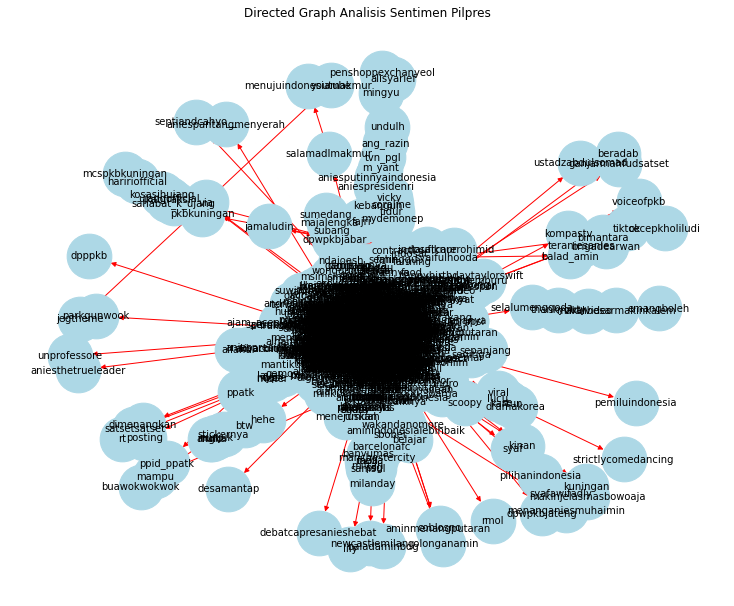

In [45]:
G = nx.DiGraph()

# Menambahkan hubungan antar kata
for i, row in df.iterrows():
    words = row['cleaned_text'].split()
    for j in range(len(words) - 1):
        G.add_edge(words[j], words[j + 1], sentiment=row['Sentiment'])

# Visualisasi graf
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
edge_colors = ['green' if G[u][v]['sentiment'] == 'positif' else 'red' for u, v in G.edges]
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', edge_color=edge_colors, font_size=10, arrows=True)
plt.title("Directed Graph Analisis Sentimen Pilpres")
plt.show()